In [15]:
from tensorflow.keras.applications import DenseNet121
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import pickle

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Train",
    target_size=(224, 224),
    shuffle=True,
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

base_model = DenseNet121(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Found 463 images belonging to 3 classes.


Found 110 images belonging to 3 classes.


In [17]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'v5DenseNetmodelsave.keras',
    monitor='val_accuracy',
    save_best_only='True',
    verbose=1
)

Epoch 1/50


c:\Users\User\anaconda3\envs\vae_stud\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4293 - loss: 31.3281
Epoch 1: val_accuracy improved from -inf to 0.39091, saving model to v5DenseNetmodelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4340 - loss: 30.7999 - val_accuracy: 0.3909 - val_loss: 10.1196
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6524 - loss: 4.7314
Epoch 2: val_accuracy improved from 0.39091 to 0.82727, saving model to v5DenseNetmodelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6547 - loss: 4.6563 - val_accuracy: 0.8273 - val_loss: 0.9059
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7622 - loss: 1.3627
Epoch 3: val_accuracy did not improve from 0.82727
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7634 - loss: 1.3577 - val_accuracy: 0.8182 - val_loss: 1.1812
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7739 - loss: 1.4680
Epoch 4: val_accuracy improved from 0.82727 to 0.84545, saving model to v5DenseNetmodel

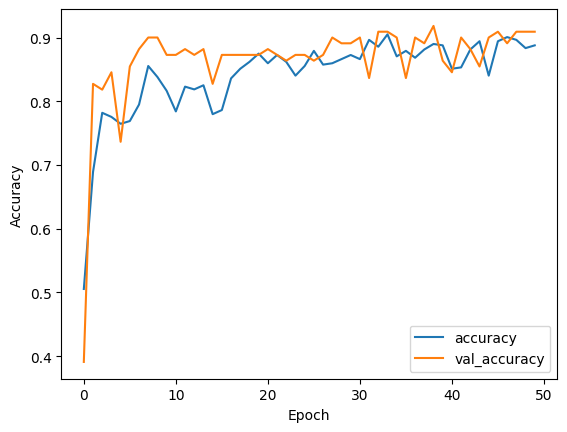

In [18]:
history = model.fit(
    train_generator,
    epochs=50,  
    validation_data=validation_generator,
    callbacks=[Model_Checkpoint],
    batch_size=32)  

with open('v5DenseNettraining_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
    
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

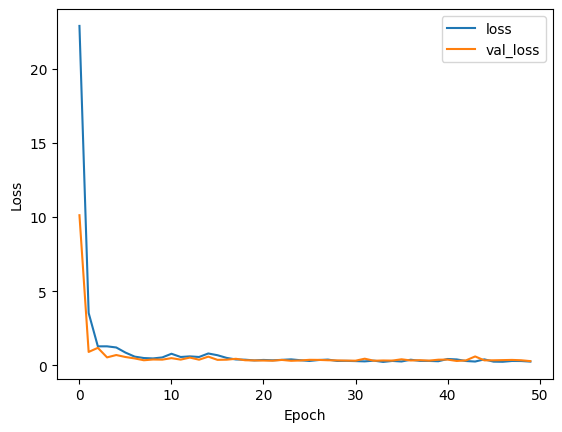

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = tf.keras.models.load_model('v5DenseNetmodelsave.keras')

In [21]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 844ms/step - accuracy: 0.9103 - loss: 0.1755
Test accuracy: 91.43%
Test loss: 0.1643


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


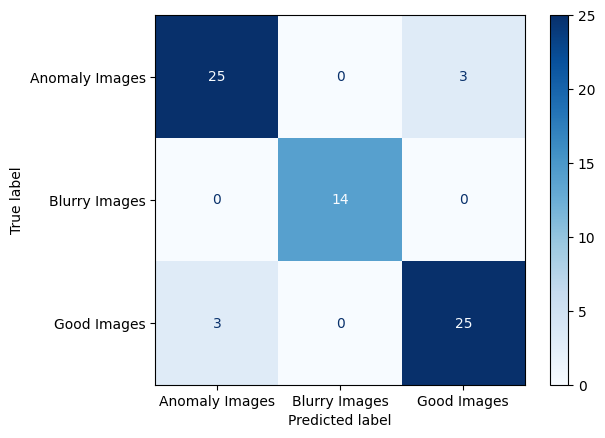

In [23]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()